# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing alorithhms which can discover patterns in visual data. Such as the camera of self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we're modified it to only use two classes (pizza & steak) using the image data modification notebook:https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

**Note:** We start with a smaller dataset so we can experiment quickly and figure what works (orbetter yet what doesn't work) before scaling up.

In [1]:
import zipfile
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_stake.zip")
# zip_ref.extractall()
# zip_ref.close()

## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is become one with the data.

And for a computer vision project ... this usually means visualizing many samples of your data.

In [2]:
!ls pizza_steak

test
train


In [3]:
! ls pizza_steak/train/

pizza
steak


In [4]:
!ls pizza_steak/train/steak/

1000205.jpg
100135.jpg
101312.jpg
1021458.jpg
1032846.jpg
10380.jpg
1049459.jpg
1053665.jpg
1068516.jpg
1068975.jpg
1081258.jpg
1090122.jpg
1093966.jpg
1098844.jpg
1100074.jpg
1105280.jpg
1117936.jpg
1126126.jpg
114601.jpg
1147047.jpg
1147883.jpg
1155665.jpg
1163977.jpg
1190233.jpg
1208405.jpg
1209120.jpg
1212161.jpg
1213988.jpg
1219039.jpg
1225762.jpg
1230968.jpg
1236155.jpg
1241193.jpg
1248337.jpg
1257104.jpg
126345.jpg
1264050.jpg
1264154.jpg
1264858.jpg
127029.jpg
1289900.jpg
1290362.jpg
1295457.jpg
1312841.jpg
1313316.jpg
1324791.jpg
1327567.jpg
1327667.jpg
1333055.jpg
1334054.jpg
1335556.jpg
1337814.jpg
1340977.jpg
1343209.jpg
134369.jpg
1344105.jpg
134598.jpg
1346387.jpg
1348047.jpg
1351372.jpg
1362989.jpg
1367035.jpg
1371177.jpg
1375640.jpg
1382427.jpg
1392718.jpg
1395906.jpg
1400760.jpg
1403005.jpg
1404770.jpg
140832.jpg
141056.jpg
141135.jpg
1413972.jpg
1421393.jpg
1428947.jpg
1433912.jpg
143490.jpg
1445352.jpg
1446401.jpg
1453991.jpg
1456841.jpg
146833.jpg
1476404.jpg
148508

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

1575322.jpg
1588879.jpg
1594719.jpg
1595869.jpg
1598345.jpg
1598885.jpg
1600179.jpg
1600794.jpg
160552.jpg
1606596.jpg
1615395.jpg
1618011.jpg
1619357.jpg
1621763.jpg
1623325.jpg
1624450.jpg
1624747.jpg
1628861.jpg
1632774.jpg
1636831.jpg
1645470.jpg
1647351.jpg
1650002.jpg
165639.jpg
1658186.jpg
1658443.jpg
165964.jpg
167069.jpg
1675632.jpg
1678108.jpg
168006.jpg
1682496.jpg
1684438.jpg
168775.jpg
1697339.jpg
1710569.jpg
1714605.jpg
1724387.jpg
1724717.jpg
172936.jpg
1736543.jpg
1736968.jpg
1746626.jpg
1752330.jpg
1761285.jpg
176508.jpg
1772039.jpg
1777107.jpg
1787505.jpg
179293.jpg
1816235.jpg
1822407.jpg
1823263.jpg
1826066.jpg
1828502.jpg
1828969.jpg
1829045.jpg
1829088.jpg
1836332.jpg
1839025.jpg
1839481.jpg
183995.jpg
184110.jpg
184226.jpg
1846706.jpg
1849364.jpg
1849463.jpg
1849542.jpg
1853564.jpg
1869467.jpg
1870942.jpg
187303.jpg
187521.jpg
1888450.jpg
There are 2 directories and 0 images in 'pizza_steak'.
1889336.jpg
1907039.jpg
1925230.jpg
1927984.jpg
1930577.jpg
1937872.jpg

In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically. 

In [7]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))  # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [8]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    
    # Read the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    
    print(f"Image shape: {img.shape}") # show the shape of the image
    
    return img

['917774.jpg']
Image shape: (512, 512, 3)


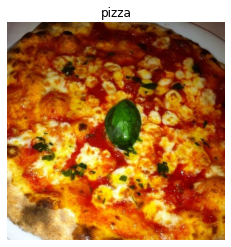

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir = "pizza_steak/train/",
                       target_class="pizza")

In [10]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[100,  85,  82],
        [100,  85,  82],
        [100,  85,  82],
        ...,
        [ 85,  61,  51],
        [ 83,  59,  49],
        [ 80,  56,  46]],

       [[ 99,  84,  81],
        [100,  85,  82],
        [101,  86,  83],
        ...,
        [ 84,  60,  50],
        [ 84,  60,  50],
        [ 85,  61,  51]],

       [[ 98,  83,  80],
        [100,  85,  82],
        [103,  88,  85],
        ...,
        [ 83,  59,  49],
        [ 85,  61,  51],
        [ 88,  64,  54]],

       ...,

       [[240, 245, 251],
        [208, 213, 219],
        [185, 190, 196],
        ...,
        [163, 111,  35],
        [159, 107,  31],
        [153, 102,  23]],

       [[249, 254, 255],
        [240, 245, 251],
        [217, 222, 228],
        ...,
        [160, 107,  29],
        [160, 107,  29],
        [160, 107,  27]],

       [[243, 248, 254],
        [249, 254, 255],
        [242, 247, 253],
        ...,
        [149,  96,  1

In [11]:
# View thr image shape
img.shape # returns width, height, colour channels

(512, 512, 3)

**Note:** As we're discussed before, many machine learning models, including neural networks perfer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values bydividing the image arrays by 255. (since is the maximum pixel value).

In [12]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.39215686, 0.33333333, 0.32156863],
        [0.39215686, 0.33333333, 0.32156863],
        [0.39215686, 0.33333333, 0.32156863],
        ...,
        [0.33333333, 0.23921569, 0.2       ],
        [0.3254902 , 0.23137255, 0.19215686],
        [0.31372549, 0.21960784, 0.18039216]],

       [[0.38823529, 0.32941176, 0.31764706],
        [0.39215686, 0.33333333, 0.32156863],
        [0.39607843, 0.3372549 , 0.3254902 ],
        ...,
        [0.32941176, 0.23529412, 0.19607843],
        [0.32941176, 0.23529412, 0.19607843],
        [0.33333333, 0.23921569, 0.2       ]],

       [[0.38431373, 0.3254902 , 0.31372549],
        [0.39215686, 0.33333333, 0.32156863],
        [0.40392157, 0.34509804, 0.33333333],
        ...,
        [0.3254902 , 0.23137255, 0.19215686],
        [0.33333333, 0.23921569, 0.2       ],
        [0.34509804, 0.25098039, 0.21176471]],

       ...,

       [[0.94117647, 0.96078431, 0.98431373],
        [0.81568627, 0.83529412, 0.85882353],
        [0.7254902 , 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find  patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale= 1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir =  "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                             padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 81s 2s/step - loss: 0.5837 - accuracy: 0.6840 - val_loss: 0.4798 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 76s 2s/step - loss: 0.4371 - accuracy: 0.7973 - val_loss: 0.3468 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 77s 2s/step - loss: 0.3967 - accuracy: 0.8180 - val_loss: 0.3627 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 77s 2s/step - loss: 0.3794 - accuracy: 0.8427 - val_loss: 0.3417 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 78s 2s/step - loss: 0.3265 - accuracy: 0.8613 - val_loss: 0.3350 - val_accuracy: 0.8560


In [14]:
len(train_data)

47

**Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure you're using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelator -> GPU (you may have to rerun some cells above) - for Google Colab

In [15]:
# Get the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before

Let's replicate the model we're built in a previous section to see if it works with our image data.

The model we're building is from the TensorFlow playground:


In [16]:
# Set the random seed
tf.random.set_seed(24)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 17s 334ms/step - loss: 1.0567 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 13s 272ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 13s 279ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 14s 300ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 17s 358ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [17]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly ... let's try to improve the model_2

In [18]:
# Build model 3 with 1 more hidden layers and 100 neurons

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# 3 Fit the model
history_3 = model_3.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 26s 498ms/step - loss: 3.1799 - accuracy: 0.6347 - val_loss: 0.5036 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 21s 439ms/step - loss: 1.3220 - accuracy: 0.6873 - val_loss: 0.9609 - val_accuracy: 0.7600
Epoch 3/5
47/47 [==============================] - 22s 464ms/step - loss: 0.7774 - accuracy: 0.7153 - val_loss: 0.4482 - val_accuracy: 0.7880
Epoch 4/5
47/47 [==============================] - 22s 465ms/step - loss: 0.5352 - accuracy: 0.7800 - val_loss: 0.4687 - val_accuracy: 0.7600
Epoch 5/5
47/47 [==============================] - 21s 445ms/step - loss: 0.4868 - accuracy: 0.7773 - val_loss: 0.4684 - val_accuracy: 0.7780


In [19]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [20]:
15073201/31101

484.6532587376612

**Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitvely, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural netowrk seeks to sort out and learn the most important patterns in an image.** So even though these are less learnable paramters in our convolutinal neural network, there are often more helpful in dechiphering between different **features** in an image. 

In [21]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Binary classification: let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Created a model (start with a baseline) - start with a beanchmark - article for validation
4. Fit the model
5. Evalaute the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['1621763.jpg']
Image shape: (512, 512, 3)
['962785.jpg']
Image shape: (512, 341, 3)


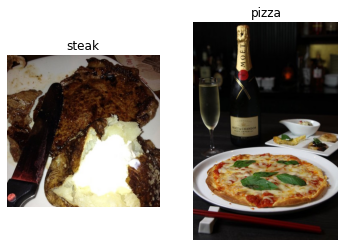

In [22]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [23]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather tahn look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your preocessor (CPU, GPU, TPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

32 is a good fit for the batch size ... it is the optimal number.

In [24]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [25]:
# Load in our image data from directories and turn them into batchs
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224, 224),
                                            class_mode="binary",
                                            batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [28]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train data
len(images), len(labels)

(32, 32)

In [29]:
# How many batches are there?
len(train_data)

47

In [30]:
1500/32

46.875

In [31]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098],
          ...,
          [0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098]],
 
         [[0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098],
          ...,
          [0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098]],
 
         [[0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098],
          ...,
          [0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098]],
 
         ...,
 
         [[0.6392157 , 0.6       , 0.6039216 ],
          [0.62745

In [32]:
images[7]

array([[[0.86666673, 0.43921572, 0.1764706 ],
        [0.8980393 , 0.6       , 0.29411766],
        [1.        , 0.8705883 , 0.50980395],
        ...,
        [0.86666673, 0.73333335, 0.48235297],
        [0.80392164, 0.6666667 , 0.44705886],
        [0.87843144, 0.7490196 , 0.5411765 ]],

       [[0.96470594, 0.54509807, 0.2784314 ],
        [0.9058824 , 0.627451  , 0.3137255 ],
        [1.        , 0.8745099 , 0.50980395],
        ...,
        [0.6745098 , 0.5411765 , 0.2901961 ],
        [0.67058825, 0.54509807, 0.3137255 ],
        [0.7568628 , 0.6313726 , 0.40784317]],

       [[0.9490197 , 0.54509807, 0.27450982],
        [1.        , 0.73333335, 0.4156863 ],
        [0.9960785 , 0.882353  , 0.52156866],
        ...,
        [0.7019608 , 0.5803922 , 0.3254902 ],
        [0.6745098 , 0.5568628 , 0.3137255 ],
        [0.7411765 , 0.62352943, 0.38823533]],

       ...,

       [[0.8980393 , 0.5686275 , 0.23137257],
        [0.7490196 , 0.40784317, 0.10588236],
        [0.80392164, 0

In [33]:
images[7].shape

(224, 224, 3)

In [34]:
# View the first batch of labels,
labels

array([1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.],
      dtype=float32)